In [1]:
%pylab inline
import matplotlib
import seaborn as sns
import pandas as pd
from pprint import pprint
import re
sns.set(palette='deep')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# >>>Count per Activity
# Without redundancy
dict1={'2': [0, 0, 0], '6': [0, 2061, 339], '4': [0, 61760, 8034], '8': [0, 334, 200], '7': [0, 37, 24], '3': [0, 54, 0], '5': [0, 18623, 7920], '1': [0, 860, 348]}
# With redundancy
dict2={'2': [0, 0, 0], '6': [0, 2061, 339], '4': [0, 61760, 8034], '8': [0, 334, 200], '7': [0, 37, 24], '3': [0, 54, 0], '5': [0, 18623, 7920], '1': [0, 860, 348]}
# >>>Overall Count
# Without redundancy
# ProperCut: 0 | Overcut: 281661 | Undercut: 37242
# With redundancy
# ProperCut: 0 | Overcut: 281661 | Undercut: 37242


# Case II: When all activities are considered excluding R1_Sleep, R2_Sleep, R1_Sleping_Not_in_Bed, R2_Sleeping_Not_in_Bed.

# >>>Count per Activity

# Order: Propercut, Overcut, Undercut
# Without redundancy
dict3={'2': [0, 53, 53], '25': [4, 2184, 1039], '3': [0, 314, 56], '1': [0, 77, 99], '4': [2, 16, 114], '14': [0, 145, 171], '8': [20, 804, 1118], '18': [5, 28, 115], '24': [2, 917, 285], '12': [1, 1391, 317], '11': [0, 40, 53], '5': [0, 20, 9], '20': [16, 768, 956], '6': [12, 20, 204], '7': [0, 434, 270], '23': [0, 34, 42], '15': [0, 23, 42], '13': [7, 2639, 1253], '19': [2, 549, 419], '16': [1, 372, 164], '17': [1, 0, 47]}
# With redundancy
dict4={'2': [0, 53, 53], '25': [4, 2184, 1039], '3': [0, 314, 56], '1': [0, 77, 99], '4': [2, 16, 114], '14': [0, 145, 171], '8': [20, 804, 1118], '18': [5, 28, 115], '24': [2, 917, 285], '12': [1, 1391, 317], '11': [0, 40, 53], '5': [0, 20, 9], '20': [16, 768, 956], '6': [12, 20, 204], '7': [0, 434, 270], '23': [0, 34, 42], '15': [0, 23, 42], '13': [7, 2639, 1253], '19': [2, 549, 419], '16': [1, 372, 164], '17': [1, 0, 47]}
# >>>Overall Count
# Without redundancy
# ProperCut: 12 | Overcut: 243020 | Undercut: 38873
# With redundancy
# ProperCut: 13 | Overcut: 247854 | Undercut: 37352

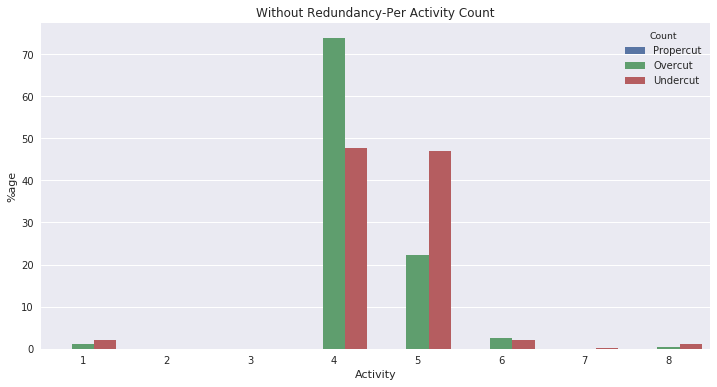

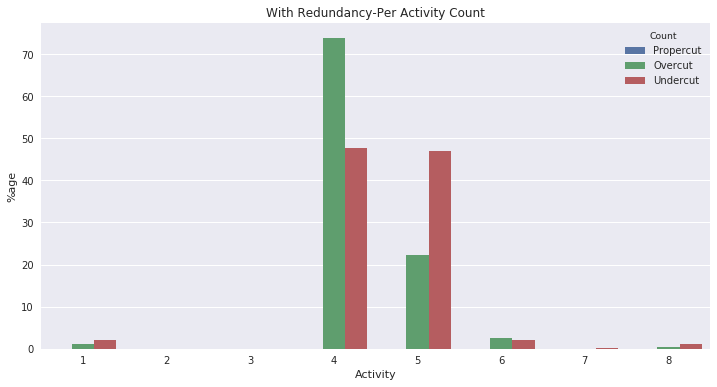

In [30]:
def get_visual_dict(s,string,dict_):
    dict_ = dict(sorted(dict_.items(),key=lambda x: int(x[0])))
    total= np.sum(np.array(list(dict_.values())),0)
    if total[0]==0:
        total[0]=1
    temp=[[act,100*(j/total[ind]),name] for act,i in dict_.items() for ind,(j,name) in enumerate(zip(i,['Propercut','Overcut','Undercut']))]
    df = pd.DataFrame(temp,columns=['Activity','%age','Count'])
    plt.figure(figsize=(12,6))
    plt.title(string)
    sns.barplot(x="Activity", y="%age", hue="Count", data=df)
#     plt.legend(loc=9,ncol=3, frameon=False, borderaxespad =-0.45)
#     plt.savefig('Chi_POU_Count/'+f'{s}.png', format='png')
#     plt.savefig('Dataset-Twor/Sensor_modified_Chi_POU_Count/'+f'{s}.png', format='png')
#     plt.savefig('Sensor_modified_Chi_POU_Count/'+f'{s}.png', format='png')
    plt.show()
    
    
get_visual_dict('No_act_excluded-Without_Redu','Without Redundancy-Per Activity Count',dict1)
get_visual_dict('No_act_excluded-With_Redu','With Redundancy-Per Activity Count',dict2)

# print('After removing activities: R1_Sleep, R2_Sleep, R1_Sleping_Not_in_Bed, R2_Sleeping_Not_in_Bed')

# get_visual_dict('Four_act_excluded-Without_Redu','Without Redundancy-Per Activity Count',dict3)
# get_visual_dict('Four_act_excluded-With_Redu','With Redundancy-Per Activity Count',dict4)

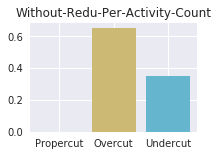

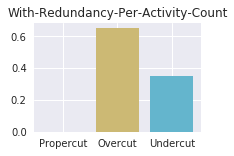

In [32]:
def get_visual(s,string,lst):
    temp =[i/sum(lst) for i in lst]
    plt.figure(figsize=(3,2))
    plt.title(string)
    plt.bar(['Propercut','Overcut','Undercut'],temp,color=['#8172b2', '#ccb974', '#64b5cd'])
#     plt.savefig('Chi_POU_Count/Overall_Count'+f'{s}.png', format='png')
#     plt.savefig('Dataset-Twor/Sensor_modified_Chi_POU_Count/'+f'{s}.png', format='png')
#     plt.savefig('Sensor_modified_Chi_POU_Count/Overall_Count'+f'{s}.png', format='png')
    plt.show()
get_visual('Overall_Count_No_act_excluded-Without_Redu','Without-Redu-Per-Activity-Count',[0, 808, 433])
get_visual('Overall_Count_No_act_excluded-With_Redu','With-Redundancy-Per-Activity-Count',[0, 808, 433])

# print('After removing activities: R1_Sleep, R2_Sleep, R1_Sleping_Not_in_Bed, R2_Sleeping_Not_in_Bed')

# get_visual('Overall_Count_Four_act_excluded-Without_Redu_','Without-Redu-Per-Activity-Count',[81,2574,2908])
# get_visual('Overall_Count_Four_act_excluded-With_Redu','With-Redu-Per-Activity-Count',[121,2534,2908])

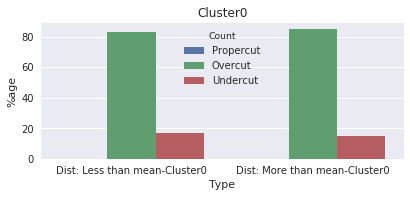

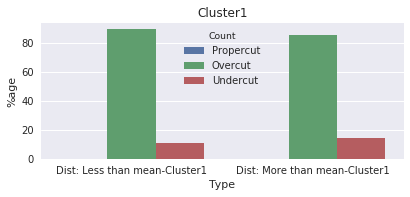

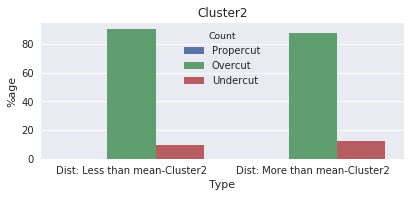

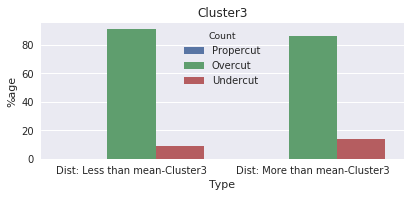

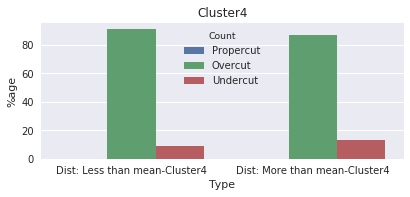

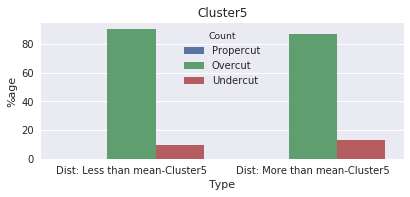

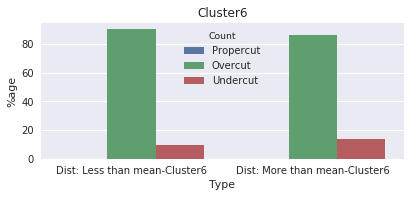

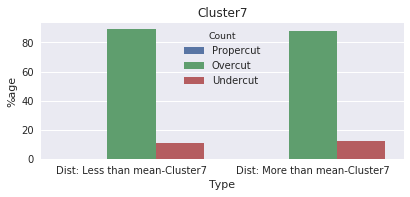

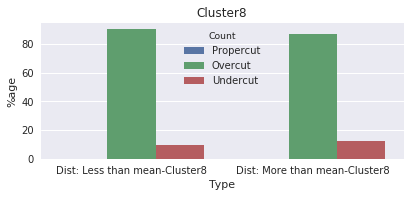

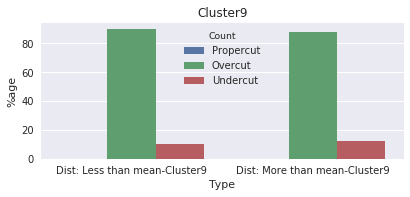

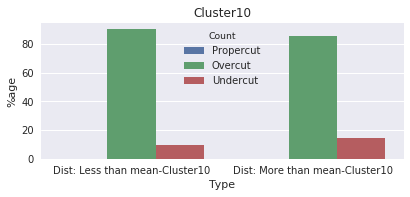

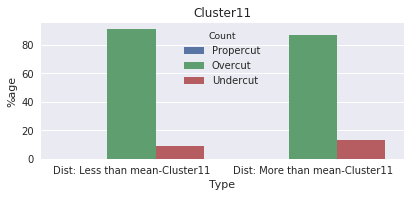

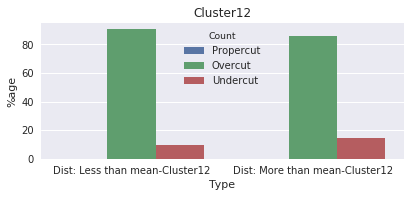

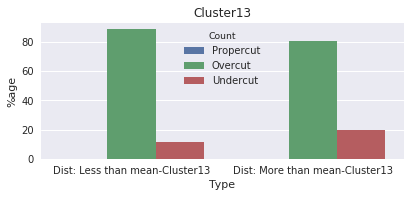

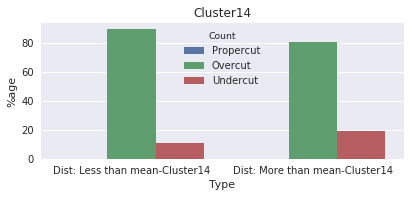

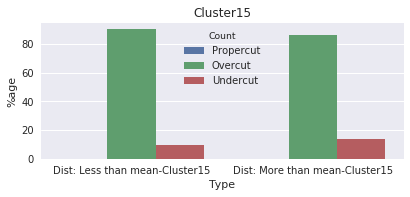

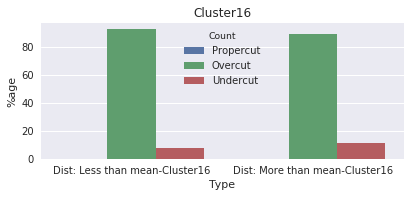

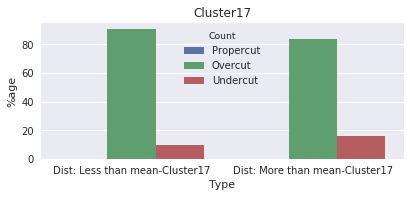

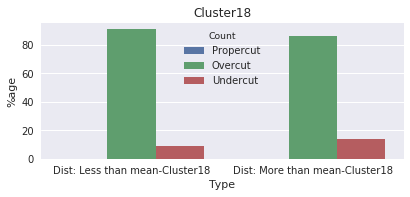

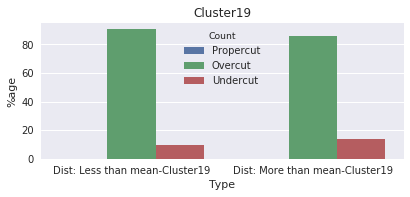

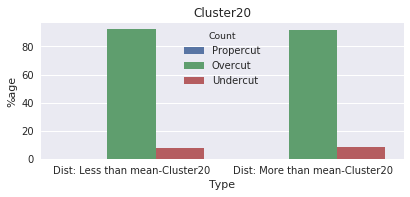

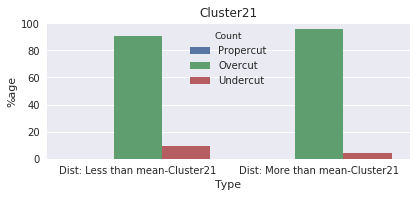

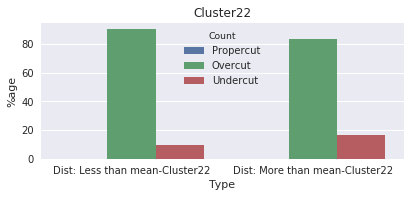

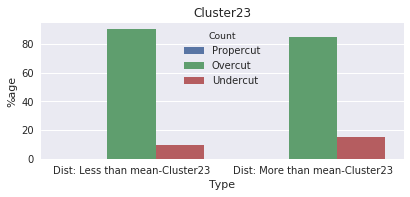

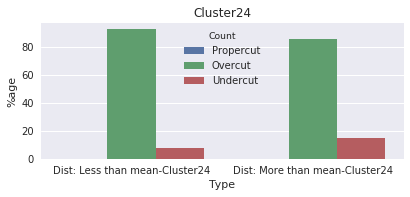

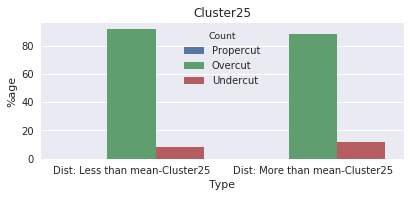

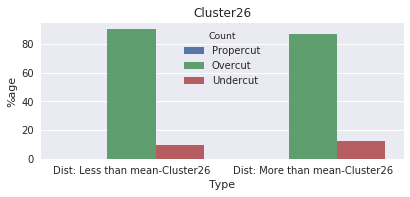

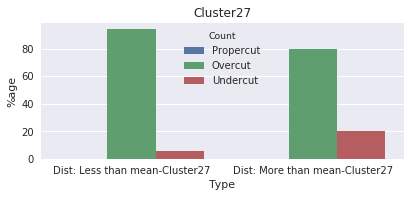

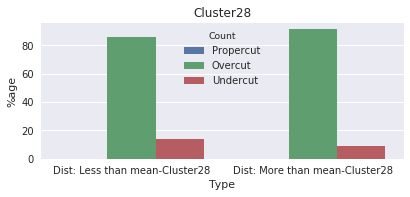

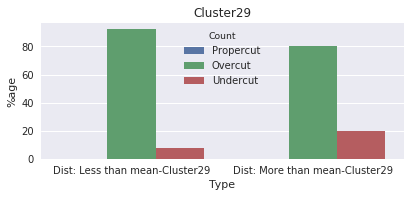

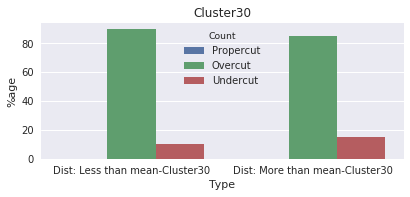

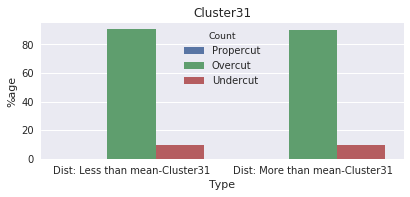

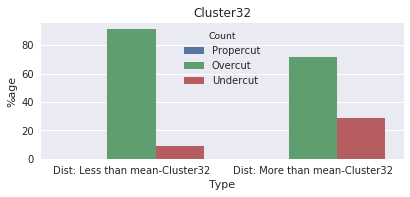

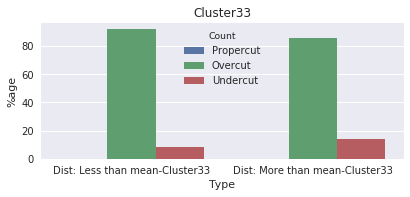

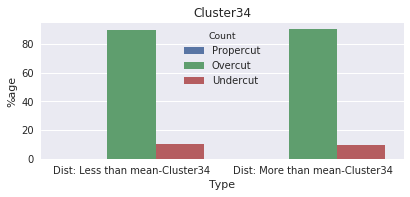

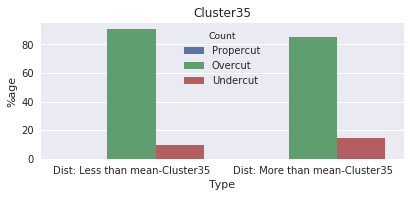

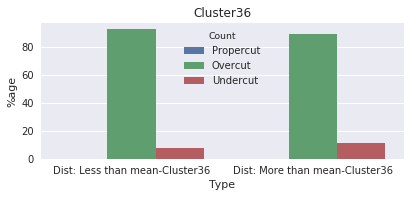

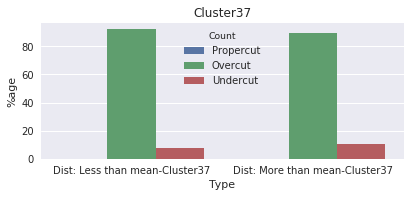

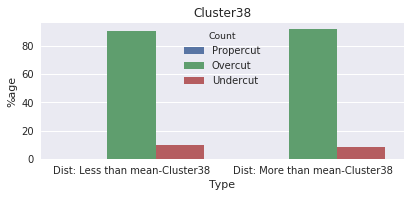

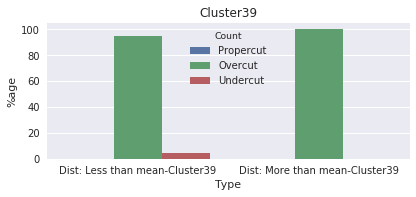

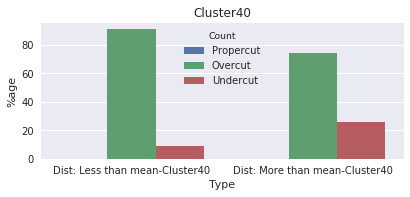

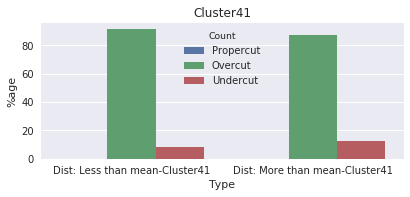

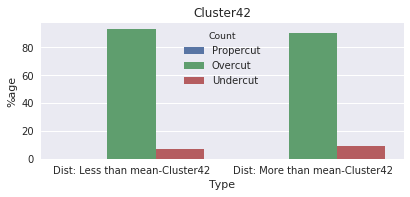

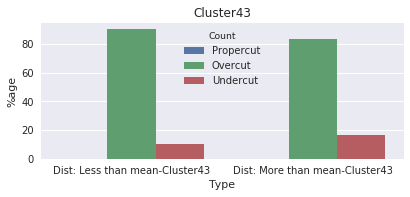

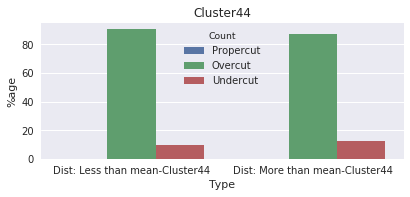

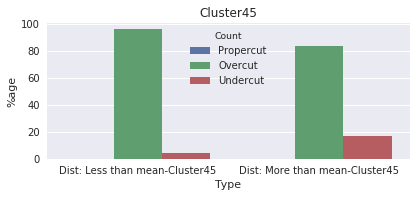

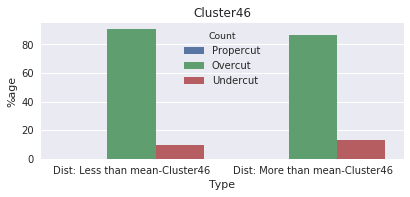

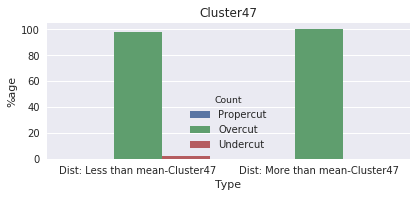

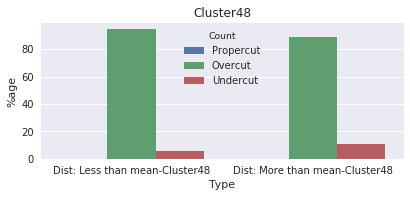

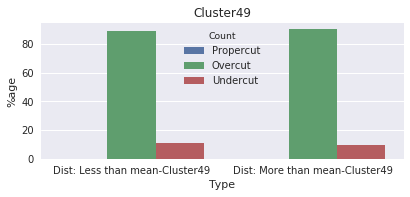

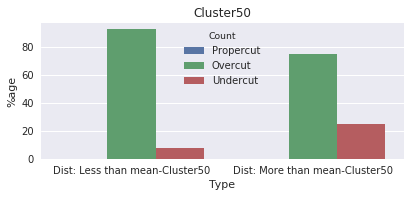

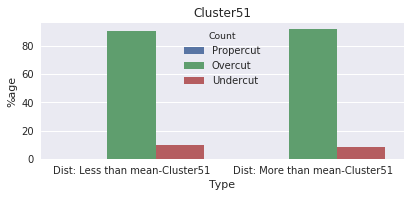

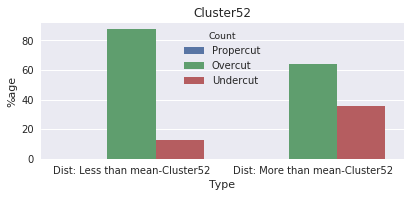

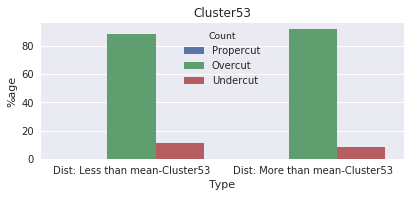

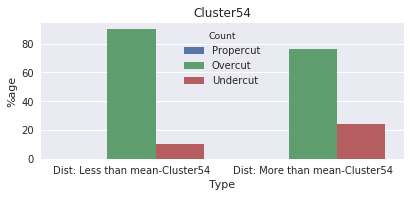

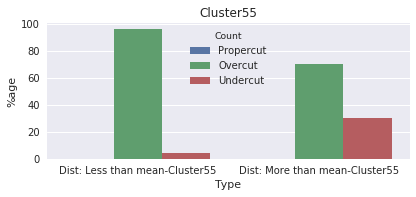

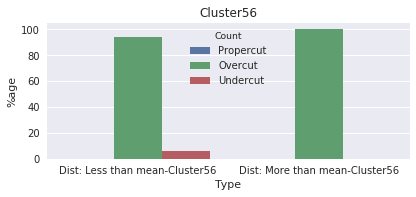

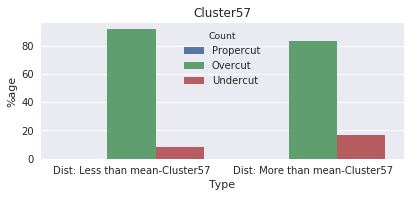

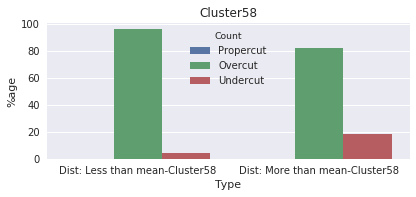

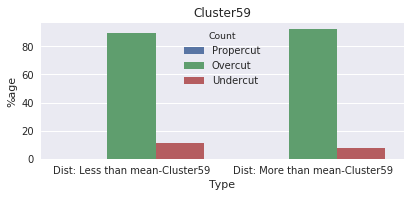

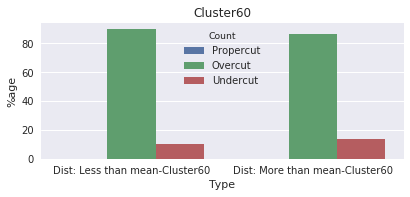

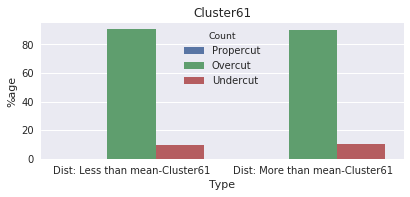

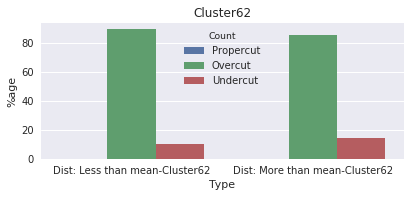

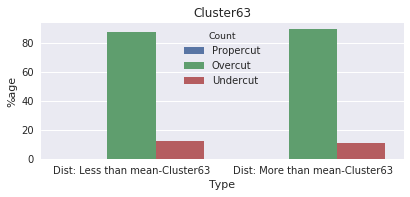

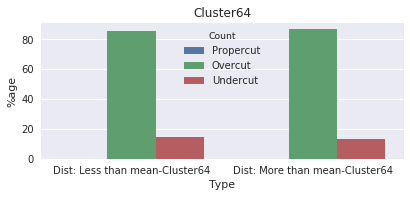

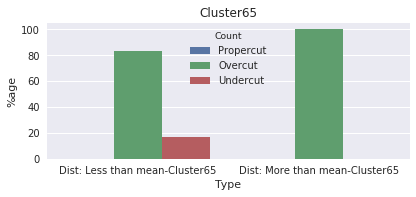

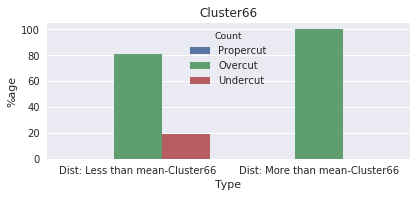

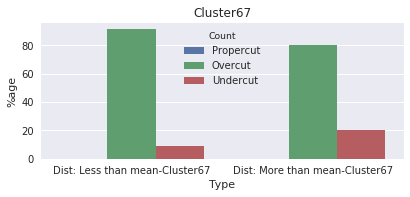

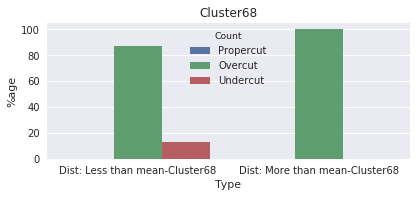

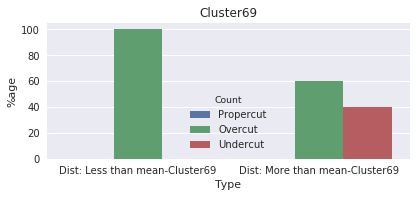

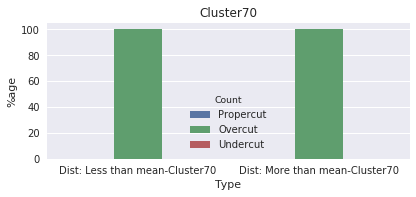

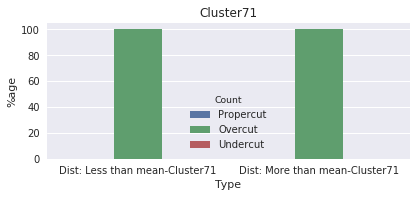

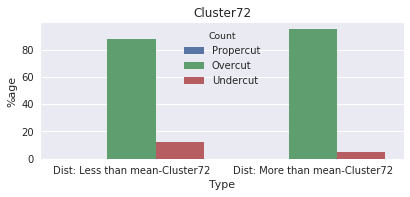

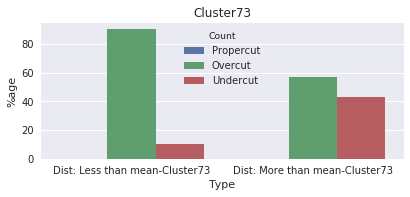

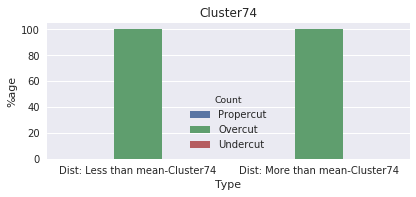

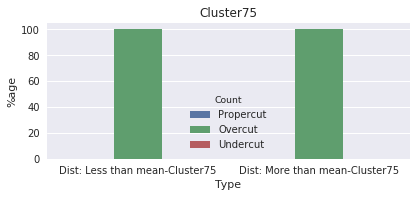

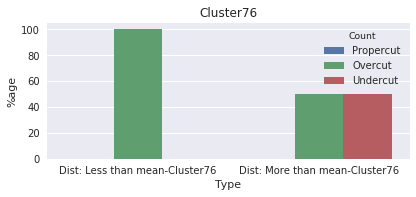

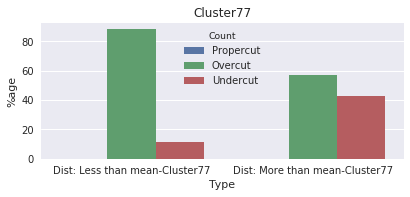

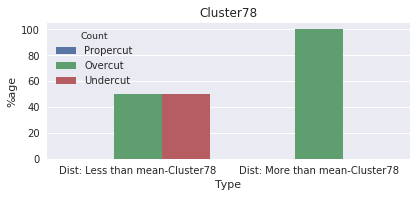

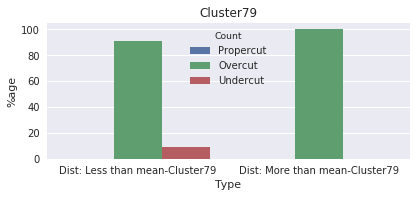

In [3]:
# For median based cluster:
with open('mean_based_Undercut_Proportion.txt','r') as fp:
    count = [i for i in fp.read().split('\n') if i!='']
    
def get_visual_freq(string,cluster,df):
    plt.figure(figsize=(6.5,2.5))
    plt.title(cluster)
    sns.barplot(x='Type',y='%age',hue='Count',data=df)
#     plt.savefig(f'POU_Count/{string}/{cluster}.png', format='png')
    plt.show()
    
def processing():
    for i in range(4,len(count)+1,4):
        pou = ['Propercut','Overcut','Undercut']
        temp=count[i-4:i]
        cluster=temp[0].split('-')[1]
        less = np.array(re.findall(r'\d+',temp[1]),dtype=int).tolist()
        more = np.array(re.findall(r'\d+',temp[3]),dtype=int).tolist()
        
        df = pd.DataFrame([[pou[i],100*(less[i]/sum(less)),temp[0].replace('Median','mean')] for i in range(3)]+[[pou[i],100*(more[i]/sum(more)),temp[2].replace('Median','mean')] for i in range(3)],
                    columns=['Count','%age','Type'])
        
#         get_visual_freq('POU_Count_perCluster_median',cluster,df)
        get_visual_freq('POU_Count_perCluster_mean',cluster,df)
processing()